In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

In [36]:
file_path = 'Online retail.xlsx'
data = pd.read_excel(file_path)

In [52]:
print(glass_df.head())
print(glass_df.columns)

Empty DataFrame
Columns: [shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil]
Index: []
Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [37]:
data = data.iloc[:, 0].str.split(',', expand=False)
mlb = MultiLabelBinarizer()
data = pd.DataFrame(mlb.fit_transform(data), columns=mlb.classes_)

In [38]:
data['target'] = data['mineral water']

In [39]:
df_majority = data[data.target == 0]
df_minority = data[data.target == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
data = pd.concat([df_majority, df_minority_upsampled])

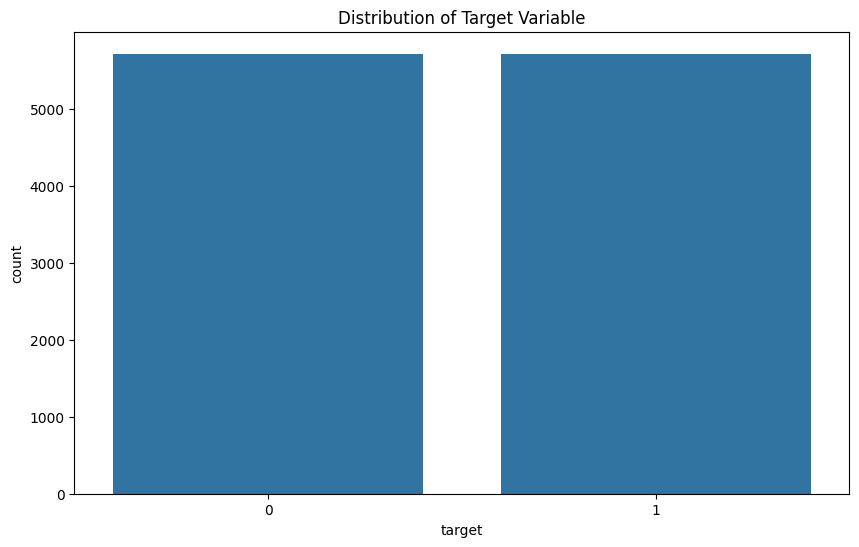

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

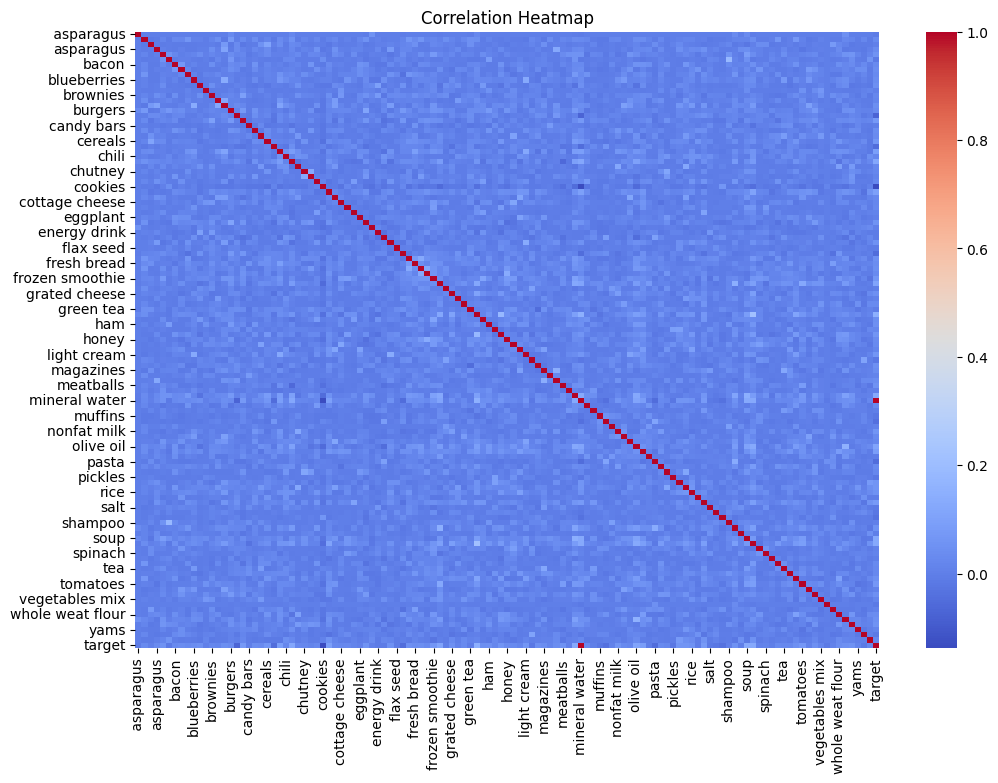

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [45]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [46]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [47]:
boosting_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [48]:
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
bagging_precision = precision_score(y_test, y_pred_bagging)
bagging_recall = recall_score(y_test, y_pred_bagging)
bagging_f1 = f1_score(y_test, y_pred_bagging)

In [49]:
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
boosting_precision = precision_score(y_test, y_pred_boosting)
boosting_recall = recall_score(y_test, y_pred_boosting)
boosting_f1 = f1_score(y_test, y_pred_boosting)

In [50]:
print("Random Forest - Accuracy: ", rf_accuracy, " Precision: ", rf_precision, " Recall: ", rf_recall, " F1 Score: ", rf_f1)
print("Bagging - Accuracy: ", bagging_accuracy, " Precision: ", bagging_precision, " Recall: ", bagging_recall, " F1 Score: ", bagging_f1)
print("Boosting - Accuracy: ", boosting_accuracy, " Precision: ", boosting_precision, " Recall: ", boosting_recall, " F1 Score: ", boosting_f1)


Random Forest - Accuracy:  1.0  Precision:  1.0  Recall:  1.0  F1 Score:  1.0
Bagging - Accuracy:  1.0  Precision:  1.0  Recall:  1.0  F1 Score:  1.0
Boosting - Accuracy:  1.0  Precision:  1.0  Recall:  1.0  F1 Score:  1.0
